In [1]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
from pylab import mpl
import os

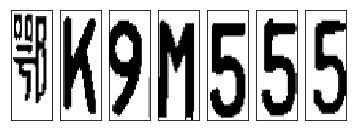

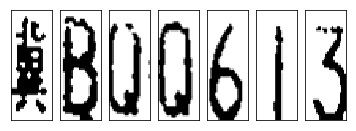

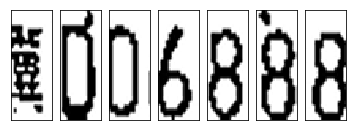

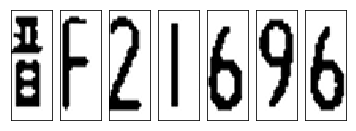

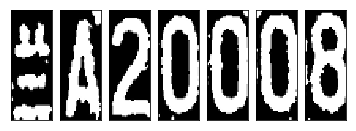

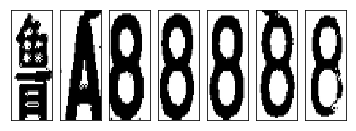

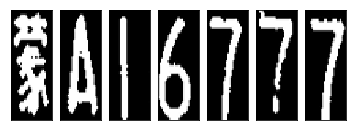

In [13]:
# 伽马变换 图像增强
def gama(img, a):
    gamma = np.array(img).copy()
    rows = img.shape[0]
    cols = img.shape[1]
    for i in range(rows):
        for j in range(cols):
            gamma[i][j] = 3*pow(gamma[i][j],a)
    return gamma
# 图片切割
def cut(img):
    img = cv2.resize(img, (200,70), interpolation=cv2.INTER_CUBIC)
    cut = []
    start = 0
    fig = plt.figure(figsize=(6, 4))
    for i in range(7):
        if i == 2:
            start = start + 16
        cut.append(img[:, start:start+26])
        start = start + 26
    for i, c in enumerate(cut):
        plt.subplot(1, 7, i+1)
        plt.imshow(c, cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.show()
# 图片0
def picture_0(img):
    # 图片灰度化
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = img_gray[5:-8, 6:-6]
    # 非局部均值去噪
    img_gray = cv2.fastNlMeansDenoising(img_gray, None, 25, 7, 21)
    # 伽马变换
    img_gray = gama(img_gray,0.6)
    # 转换为黑白图像
    img_gray = cv2.threshold(img_gray, 35,255, cv2.THRESH_BINARY_INV)[1]
    cut(img_gray)
    
def picture_1(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = img_gray[5:-11, 6:-6]
    # 非局部均值去噪
    img_gray = cv2.fastNlMeansDenoising(img_gray, None, 25, 7, 21)
    # gama变化
    img_gray = gama(img_gray,0.6)
    img_gray = cv2.GaussianBlur(img_gray, (3, 3), 0)
    img_gray = cv2.medianBlur(img_gray, 3)
#     hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
#     plt.plot(hist)
#     plt.title('Hist')
#     plt.show()
    # 转换为黑白图像
    img_gray = cv2.threshold(img_gray, 55, 255, cv2.THRESH_BINARY_INV)[1]
    cut(img_gray)

def picture_2(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = img_gray[2:-8, 6:-4]
    # 非局部均值去噪
    img_gray = cv2.fastNlMeansDenoising(img_gray, None, 10, 7, 21)
    # 转换为黑白图像
    img_gray = cv2.threshold(img_gray, 215, 255, cv2.THRESH_BINARY_INV)[1]
    cut(img_gray)

def picture_3(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = img_gray[5:-4, 4:-2]
    
    # 非局部均值去噪
    img_gray = cv2.fastNlMeansDenoising(img_gray, None, 25, 7, 21)
    
    # 转换为黑白图像
    img_gray = cv2.threshold(img_gray, 155, 255, cv2.THRESH_BINARY_INV)[1]
    cut(img_gray)

def picture_4(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = img_gray[28:-28, 16:-16]
    
    # 非局部均值去噪
    img_gray = cv2.fastNlMeansDenoising(img_gray, None, 25, 7, 21)
    # 高斯平滑和中值滤波
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
    img_gray = cv2.medianBlur(img_gray, 3)
    
    # 转换为黑白图像
    img_gray = cv2.threshold(img_gray, 130,255, cv2.THRESH_BINARY_INV)[1]
    cut(img_gray)

def picture_5(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = img_gray[10:-8, 2:-1]
    
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
    img_gray = cv2.medianBlur(img_gray, 3)
    
    # 拉普拉斯变换图像增强
    kernel = np.array([ [0, -1, 0], [-1,  5, -1], [0, -1, 0] ])
    img_gray = cv2.filter2D(img_gray, cv2.CV_8UC3, kernel)
    
    # 限制对比度自适应直方图均衡化
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img_gray = clahe.apply(img_gray)

    # 转换为黑白图像
    img_gray = cv2.threshold(img_gray, 135, 255, cv2.THRESH_BINARY_INV)[1]
    cut(img_gray)
    
def picture_6(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = img_gray[4:-6, 0:-1]
    
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
    img_gray = cv2.medianBlur(img_gray, 3)
    
    img_gray = gama(img_gray, 0.6)
    kernel = np.array([ [0, -1, 0], [-1,  5, -1], [0, -1, 0] ])
    img_gray = cv2.filter2D(img_gray, cv2.CV_8UC3, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    img_gray = cv2.morphologyEx(img_gray, cv2.MORPH_CLOSE, kernel)
    
    # 转换为黑白图像
    img_gray = cv2.threshold(img_gray, 45, 255, cv2.THRESH_BINARY_INV)[1]
    cut(img_gray) 
    
def main():
    name = ['鄂K9M555.jpg', '冀BQQ613.jpg', '冀D06888.jpg', '晋F21696.jpg',
           '兰A20008.jpg', '鲁A88888.jpg', '蒙A16777.jpg']
    path = 'E:\\homework\\DigitImage\\大作业12.8交\\车牌\\II类\\'
    for index, i in enumerate(name):
        img = cv2.imdecode(np.fromfile(path+i, dtype=np.uint8), -1)
        eval('picture_'+str(index))(img)

if __name__ == '__main__':
    main()

In [3]:
'''
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
img_gray = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, kernel)
img_gray = cv2.morphologyEx(img_gray, cv2.MORPH_CLOSE, kernel)
'''

'\nkernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))\nimg_gray = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, kernel)\nimg_gray = cv2.morphologyEx(img_gray, cv2.MORPH_CLOSE, kernel)\n'